#Observations and Insights
    # Maximum numbers of tests were conducted on Ramicane and Capomulin treatments
    # The study was unbiased based on gender as both male and female mice are almost equal. Males constitute 50.6% while females constitute 49.4%
    #The Tumour Volume values are most accurate for Ramicane and Capomulin drug treatments as their variances are one of the least. Variance of Ramicane and Capomulin is 23.38 and 24.83 respectively
    #Tests have shown that Capomulin treatment considerably declines volume of tumour from 45mm3 to less than 10mm3 in 45 days


## Dependencies and starter code

In [17]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

combined_results_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_results_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_results_sum_df = combined_results_df.groupby(['Drug Regimen']).sum()
grouped_results_count_df = combined_results_df.groupby(['Drug Regimen']).count().reset_index()
grouped_results_mean_df = combined_results_df.groupby(['Drug Regimen']).mean()
grouped_results_median_df = combined_results_df.groupby(['Drug Regimen']).median()
grouped_results_var_df = combined_results_df.groupby(['Drug Regimen']).var(ddof=0)
grouped_results_std_df = combined_results_df.groupby(['Drug Regimen']).std(ddof=0)
grouped_results_sem_df = combined_results_df.groupby(['Drug Regimen']).sem()

df_final = pd.DataFrame(grouped_results_sum_df, columns = ["Tumor Volume (mm3)"])
df_final["Mean Tumor Volume (mm3)"] = grouped_results_mean_df["Tumor Volume (mm3)"]
df_final["Median Tumor Volume (mm3)"] = grouped_results_median_df["Tumor Volume (mm3)"]
df_final["Var Tumor Volume (mm3)"] = grouped_results_var_df["Tumor Volume (mm3)"]
df_final["Std. Tumor Volume (mm3)"] = grouped_results_std_df["Tumor Volume (mm3)"]
df_final["SEM Tumor Volume (mm3)"] = grouped_results_sem_df["Tumor Volume (mm3)"]

df_final




,Tumor Volume (mm3),Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Var Tumor Volume (mm3),Std. Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,,
Capomulin,9355.420462,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,9361.228582,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,9413.493529,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,10384.299876,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,10105.671026,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,9780.078122,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,8423.930878,52.322552,50.854632,42.088020,6.487528,0.512884
Ramicane,9169.417875,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,9816.199991,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar plots

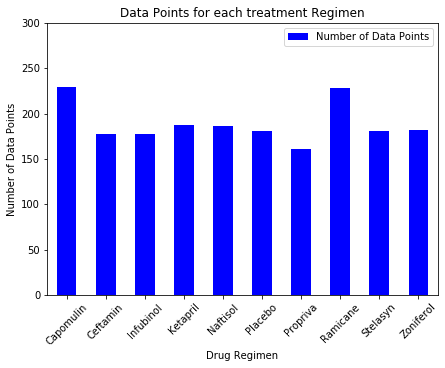

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

panda_plot = grouped_results_count_df.plot.bar(x='Drug Regimen', y='Tumor Volume (mm3)', color='b', figsize=(7,5),ylim = (0,300), title="Data Points for each treatment Regimen")
panda_plot.set_xticklabels(grouped_results_count_df['Drug Regimen'],rotation=45)
panda_plot.set_ylabel("Number of Data Points")
panda_plot.legend(['Number of Data Points'])
plt.show()
plt.tight_layout()

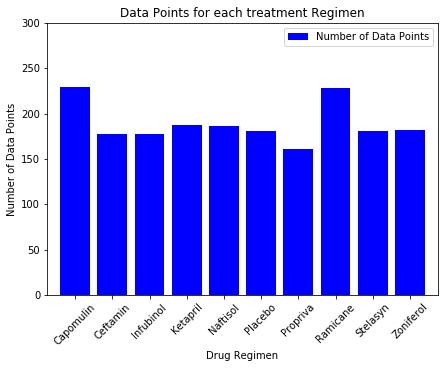

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(grouped_results_count_df['Drug Regimen']))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(7,5))
pyplot_bar = plt.bar(grouped_results_count_df['Drug Regimen'], grouped_results_count_df['Tumor Volume (mm3)'],color='b', alpha=1, align="center")
plt.xticks(tick_locations, grouped_results_count_df['Drug Regimen'], rotation= 45)
plt.title("Data Points for each treatment Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.legend(['Number of Data Points'])
plt.xlim(-.75, len(grouped_results_count_df['Drug Regimen'])-0.25)
plt.ylim(0, 300)
plt.show()

## Pie plots

Text(0, 0.5, 'female versus male mice')

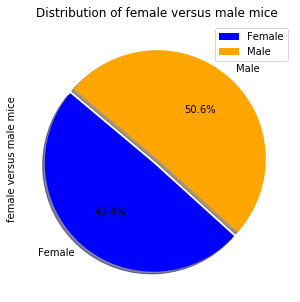

In [19]:

grouped_gender_count_panda = combined_results_df.groupby(['Sex']).count()
groupeddata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAV0AAAD3CAYAAAC+eIeLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3dd3hUZfbA8e9JQhqEkEASWkJHagJMaCqCIohtwK5jZUVX166r7s+ytl1X14V13bWjq6ijrrpqRFewYcG2oIJIWSw0kV5CTX1/f7w3ZAgJkGRm7szkfJ5nniQz9945U3LmnXPfIsYYlFJKhUec2wEopVRToklXKaXCSJOuUkqFkSZdpZQKI026SikVRpp0lVIqjJp80hWRR0Tk1iAdK09EtotIvPP3LBGZFIxjO8f7j4icH6zj1eN+/yAiG0RkTR23Xyoia53H3jqMcV0gIp+E6/5iRbDfl/u5n7NFZGao7yfaJLgdQCiJyDIgBygHKoCFwDTgMWNMJYAx5pJ6HGuSMebdurYxxqwAWjQu6j33dzvQ3RhzTsDxjw3GsesZRy5wHdDJGLOultubAVOAYcaYeeGOT0UuY8xzwHNuxxFpmkJL90RjTBrQCbgHuBF4Ith3IiKx+gHWCdhYW8J15ADJwHfhCylyxPDrrkLFGBOzF2AZcHSN64YAlUA/5++ngD84v7cBpgNbgE3Ax9gPpmecfXYB24EbgM6AAS4EVgAfBVyX4BxvFvAn4EtgK/A6kOncNgpYVVu8wDigFChz7m9ewPEmOb/HAbcAy4F12BZ8unNbVRznO7FtAG7ez/OU7uy/3jneLc7xj3Yec6UTx1M19usJ7HDuazvwvnN9L+Ad5zlcApwesM9TwEPAf5x9ZgNtgfuBzcBiYGDA9r8DfgC2Yb+pnBRw2wXAJwF/13m/NeI+E5hT47prgCLn9yTgL85ztxZ4BEgJfN2wH95rnPdGre8bZ3uD/cYS+Pj3+36rI2YD/AZY6jwXdwHdgM+AYuBfQKKzbYZz3PXOczod6BhwrFk47yPn718Bi5xtZ2C/1dQWQ9X7aiKw0tn+EmAwMN95HP/Yz+vTN+D1WQvcFPBernqdNzqPJdPt/BGyvOR2ACF9cLUkXef6FcClzu+B/wR/cv7BmjmXEYDUdqyAN+A0oDmQQu1J92egn7PNK8Czzm2jqCPpOr/fXrVtwO17/lmcf5Tvga7Yksa/gWdqxPa4E1cBUAL0ruN5mob9QEhz9v0fcGFdcdbYt+Zjbu78Q07Elq8GYZN+34DnewPgwbaQ3wd+As4D4oE/AB8EHP80oL3zj3kGNsm3c267AOef+kD3WyPmVGzi6hFw3X+BM53f7weKgEznOXkD+FPA81EO3ItNzins/32zv6Rb5361xGycmFpik1cJ8J7z+qdjP5DOd7ZtDZziPM404CXgtTreRxOw76PezvN2C/DpAV7rR5zXbiywG3gNyAY6YBsAI2t5fdKAX7ClqmTn76HObVcDnwMdnef0UeB5t/NHqC5NobxQm9XYf6iayoB22E/6MmPMx8Z5V+zH7caYHcaYXXXc/owxZoExZgdwK3B61Ym2RjobmGKM+dEYsx34P+DMGl937zDG7DK21joPm3z34sRyBvB/xphtxphlwGTg3AbGdQKwzBjzT2NMuTHmK+yHzakB27xqjJlrjNkNvArsNsZMM8ZUAC8CA6s2NMa8ZIxZbYypNMa8iG3pDWng/VYdcyf2Q+Ys5znogW0lF4mIABcB1xhjNhljtgF3Y1vHVSqB24wxJc7r3pD3DQ3Y715jTLEx5jtgATDTef23Yr85DHQe30ZjzCvGmJ1O/H8ERtZxzF9jP1AWGWPKncc6QEQ67SeOu4wxu40xM7Efgs8bY9YZY37GttYH1rLPCcAaY8xkZ99txpgvAmK42RizyhhTgm1wnBqrpZummnQ7YL/i1HQf9lN/poj8KCK/O4hjrazH7cuxLZo2BxXl/rV3jhd47ARsjbVKYG+DndR+kq8NkFjLsTo0MK5OwFAR2VJ1wX5AtA3YZm3A77tq+XtPnCJynoh8E3CsftT+/B3M/Qby4yRdwIdtCe4EsrAtxLkBx3nbub7KeucDo0pD3jcN2e+gnjcRSRWRR0VkuYgUY0tfrer4sO8E/C3gsW4ChP2//gf9+gXIxZYPatMJeDUghkXYE985dWwf1Zpc0hWRwdg31D5djZxP3+uMMV2BE4FrRWR01c11HPJALZrcgN/zsK2bDdgWQmpAXPHs/Y99oOOuxr5ZA49dzt7/AAdjgxNTzWP9XM/jVFkJfGiMaRVwaWGMubS+B3JaW48DlwOtjTGtsC08CcL9zgTaiMgAbPL1O9dvwCaOvgHHSTfGBCaSvV6bA7xvdhLwOhPwIXCA/RrjOuAQ7Nf3lsARzvV1PW+/rvG8pRhjPg1CHDXvp9t+bju2RgzJTss55jSZpCsiLUXkBOAFbK3021q2OUFEujtfMYuxn7YVzs1rsfWz+jpHRPqISCpwJ/Cy8zX6f0CyiBzvdLu6BVvPqrIW6Cwidb1GzwPXiEgXEWmB/Vr4ovMV8aA5sfwL+KOIpDmJ7lrg2focJ8B0oKeInCsizZzLYBHp3YBjNccmuPUAIjIR29Jt9P06z9PL2NZmJvYED8Z2JXwc+KuIZDv320FEjqkryAO8b74BfCISLyLjCPiaf4D9GiMN+8GxRUQygdv2s+0jwP+JSF8npnQROS0IMdQ0HWgrIleLSJLzXhsaEMMfq0oaIpIlIuNDEENEaApJ9w0R2Yb9NL0Z26d0Yh3b9gDexZ5V/wx4yBgzy7ntT8Atzleg39bj/p/BnjxZgz2BcCWAU4f7DTAV26rcgT0rXuUl5+dGEfmqluM+6Rz7I+yJqN3AFfWIK9AVzv3/iP0G4HeOX29ODXEstga6Gvu4q0461fdYC7H15c+wH0L9sb0dgnW/fmwPjZdqfFjdiP3a/7nz9fxdbMuxLvt731yFbcVWlTteO8j9GuN+7Am+DdgTVG/XtaEx5lXs8/SC81gXAEHvD+68PmOwz8UabG3+SOfmv2FPEs50/lc/B4bWdpxYUHWGVSmlVBg0hZauUkpFDE26SikVRpp0lVIqjDTpKqVUGGnSVUqpMNKkq5RSYaRJVymlwkiTrlJKhZEmXaVCRESMiDwT8HeCiKwXkekH2G/UgbZR0Ssmp05TKkLsAPqJSIozBeQYGj6RkCvmzp2bnZCQMBU754U20vZWCSwoLy+f5PF46lpZZR+adJUKrf8Ax2Mn1zkLO1HRCAARGUL1PAm7gInGmCWBO4tIc+Dv2HknErDzN78eruATEhKmtm3btndWVtbmuLg4nTMgQGVlpaxfv77PmjVrpgLeg91PP7mUCq0XsJPLJwP5wBcBty0GjjDGDAR+j50prqabscsgDcZOEHOfk4jDpV9WVlaxJtx9xcXFmaysrK3UPfNdrbSlq1QIGWPmi0hnbCv3rRo3pwNPOytXGOwE9zWNBbwBM9slY+c7XhSSgPcVpwm3bs5zU6/GqyZdpUKvCLvQ5Sjs+mVV7sKuB3eSk5hn1bKvAKfULDuo6KVJV0U2v2RiV/pIwy4D0wI7uXkydiHLqksc9sTVphqXjfjMzvAHvpcnga3GmG9FZFTA9elUn1i7oI59ZwBXiMgVxhgjIgONMV+HLtT9E8ETzOMZw9wDbRMfH+/p0aPHnjUIX3/99e8POeSQ0mDGUeWBBx5oPWfOnObTpk1bEYrjgyZd5Ta/pABd9nNJD8J97MYuF74Jm+SqFnZcACzEZ7Y3+j72wxizCjtRd01/xpYXrsWuilybu7An2+Y7K0wswy7y2GQkJSVVLl68eKHbcQSLJl0VPn4RoA9wGHC487MhSyDVVzJ21d122OXLxwbcZvDLcqqT8HfAN/jMgsbeaY111aqum4VTRjDGfAb0DLj51lq22YVdLVcFKC8v57LLLus4e/bstNLSUrnooovWXX/99RumT5+edscdd7TPysoqW7hwYepxxx23uX///rseeuihnJKSEnn11Vd/6Nu3b4nf70+/55572pWVlcVlZGSUv/jiiz/m5ubutdTV6tWrEyZOnNjp559/TgSYMmXKirFjx+5obOyadFXo+CUZu1z6YcBhxnCoCBkuR1WTAJ2dS3UL0i9rsOumzQRm4jMH3Q9TBVdJSUlcr169+gDk5uaWvPPOOz/cf//9bdLT0ysWLFiwaNeuXTJ48OBeJ554YjHA4sWLU15++eUfs7Ozyzt16tQ/KSlpw7fffrvorrvuyp48eXL2k08+uXLMmDHbzzzzzMVxcXFMmTKlzZ133tn28ccfD1wui1//+te511577dpjjjlm+9KlSxOPOeaYHj/++ON3jX08mnRVcPklBzgVOM0YhouQWHWT1LYWbeRqC5zrXAx+mYetr84EPsFnQlJTVPuqrbzw7rvvtly8eHFqUVFRBsC2bdviFy5cmJyYmGj69++/o1OnTmUAeXl5Jccee+xWgIKCgl0ffvhhGsBPP/2UOGHChI7r169vVlpaGpebm1tS835nz57dcunSpSlVf2/fvj1+8+bNcRkZGZWNeTyadFXj+aU1cEplJWeKcIQI8RB1SXZ/BBjgXG4EduCX97EDHV7DZ3btb2cVfMYYmTx58opTTjmlOPD66dOnpyUlJe3p4hYXF0dycrKp+r2iokIALr/88ryrrrpqzdlnn711+vTpaXfeeWf7Wu6DOXPmLGrRokVQu8zp4AjVMH5phV8mVj4nM4xhDfBoXBxHViXcGNccu6qtH1iDX57ALyOdmrUKgzFjxmx9+OGHs0pKSgRg/vz5ScXFxQedz7Zt2xafl5dXBvDUU0+1rm2bww8/vPjee+/Nrvr7008/Taltu/rSlq6qH78cUWm4SuBEEZrFaZppCfzKuXyPXx4D/onPbHA3rNA4mC5e4XDNNddsWLZsWVL//v17G2MkMzOz7K233vrhYPe/+eabV5911lndcnJySgsLC3esWLEiqeY2jz322MpJkybl9ezZs09FRYUMHTp026GHHtrormS6BLs6ML8kVRrOLK/g+sQE+rodThQoAV4B/oHPfOZ2MI0xb968ZQUFBTH5ARIs8+bNa1NQUND5YLfX8oKqm19alj0jN5dX8HOc8JQm3IOWBPiAT/HLTPwy3O2AVOTQ8oLal1+ydpVyfbN4Lm0Wzz59TVW9jAHG4JcZwG34zBcH2kHFNm3pqmp+Sdn+pNxbUcnKlESuT9CEG0zHAJ/jlzfxS6HbwSj3aNJVAKx9WC7cVcrKFsncEB/HPicVVNAcB/wXv7yBXwa5HYwKPy0vNHHrHpEhifE8kZNevzlBVaOdAByPX54ArsdntrgdkAoPbek2UbufkjbrH5GX26TxeavmmnBdIsAkYBF+Oc3tYFR4aEu3qfFLwtqt3JzRnBuzWhKUzt6q0doC/8IvbwC/wWdWHWgH1/glqFM74jMH7PcrIp7x48dveu21134CKCsrIzs7u2DAgAE7Pvjgg+/r2m/69OlpkydPztnfNm7Qlm4T8vXd0n/zDhbmpHN7YoIm3Ah0IrAQv1yOX/R/05GSklK5ZMmSlO3btwvAq6++2jInJ6fM7bgaSl/YJsDrEfnyLvl9nw7MyWhOD7fjUfuVhl2I8hP8ov2iHaNHj9760ksvtQJ4/vnnM0855ZRNVbd98MEHqQMHDuzVu3fvPgMHDuw1b968fU4EFxcXx5122mmd+/Xr17t37959nn322VbhjD+QJt0Y9+IVkvPXc/h0SDfuSGpWPeOXinjDga/wy6VuBxIJzj333E0vvvhixs6dO2XRokWpw4cP3zOvbUFBwe4vv/xy8aJFixbedtttP99www0da+5/0003tTvyyCOLFyxYsOjjjz9ecsstt3Ssz1wNwaQ13Rg261aZcEw+T7ZqHnFz2KqDkwg8hF+GAJfiM7vdDsgtQ4cO3bVq1aqkxx9/PPPoo4/eGnjbpk2b4s8444wuy5YtSxYRU1ZWts+MILNmzWo5Y8aMVg888EBbgJKSEvn+++8TBw0aFPbnVJNuDLrmOEm44AgeG3EI58fH6beZGHABkI9fTsFnlrkci2vGjRu35bbbbsudOXPmknXr1u3JXTfeeGOHkSNHbnvnnXd+WLJkSeJRRx11SM19jTG8/PLL3xcUFOwzb2646T9kjJl6kXS57ji+K8hjoibcmDIImItfxh5wyxh16aWXbrjuuutWDxkyZK/5i4uLi+M7duxYCvDoo4+2qW3fI488snjy5Mk5lZV2/vHZs2e7diJZW7oxwusRGdOPsWcdir9NGplux6NCIhP4D375PXA3PhemCDyILl6h0q1bt7Jbb711n2WTbrzxxjWTJk3q8sADD7QdMWJEcW373nPPPasvvvjivF69evUxxkjHjh1L3OpKplM7xgCvR+LG5fObcw7n3pYppLodjwqLIuBcfKbWJBMsOrXjgenUjk2M1yPNTh3C3b8axRRNuE2KF/jQWZNORRFNulHM65HUiSN5wncY1yc3o5nb8aiwGwB8jF86uR2IOniadKOU1yOtrh7HaxM8nJugJ8yash7AbPzSO0THr6ysrNRFmergPDf1Wh1Y/1mj0KlDpd2tJ/HeUX0Zo0shKqAD8BF+yQ/BsResX78+XRPvviorK2X9+vXpwIL67Kcn0qKM1yPdbx7Pv4d2p7/bsaiIsxEYjc/MC9YB586dm52QkDAV6Ic20mqqBBaUl5dP8ng8+/SqqIsm3Sji9Ujva4/jhVG9CUWLRsWGjcDR+Mw3bgeiaqefXFHC65Eel43hGU246gBaA+/pZDmRS5NuFPB6pPMFR/DkMfkEdy5TFasygTe1O1lk0qQb4bwe6Tjew8MTCjnM7VhUVOkEvI5fkt0ORO1Nk24E83qkzcjeTDl/BGPiBD17rOprKDANv/ZxiSSadCOU1yNp+Xn88bIxjE+IJ97teFTUOg34o9tBqGqadCOQ1yPJ6Slcc/U4Tk/WicdV4/0ffrnA7SCUpUk3wng9IsAF1x3PeW3ScG1JERVzHsMvo9wOQmnSjUSjzhzOeQM60c3tQFRMaQa8gl/0feUyHRwRQbwe6dI/lyl3nMIJCfE613Fjdb4K0pIhPg4S4mHOH2DTdjjj77BsPXTOgn9dCRnN9913xQaY9Dis3AQCvHWD3f7sB+HblXDCQLj7DLvtXa9Cfi6MLwzrw2uoL4DD8JkKtwNpqrSlGyG8HmnRMoWrf3s8IzXhBs8Ht8A3f7IJF+CeIhjdF5ZOsT/vKap9v/MegetPgEX3wZd3QXZLmL/C3jb/Hvh4CWzdCb9shi9/iJqEC7ZHw81uB9GUadKNAF6PxAEX3Hgix2foIpIh9fpXcP4I+/v5I+C1WtZBWLgKyitgjDO7RYtkSE2CZvGwqxQqK6G03Lagf/8y3Hlq+OIPklvxS/R8TMQYTbqR4ahzDuPs/rlaxw0mERh7D3huhsfet9et3QrtnI+1dhmwbuu++/1vDbRKhZP/CgNvguv9UFEJvTtAXhsYdDOcPhS+XwMGGNg5XI8oaBKAZ/CLa+uENWX6NdZlXo9069mWS08ejLY8gmz2bdDeSaxj7oFe7Q5uv/IKWz74+m7Ia21rwE99BBeOgvvPrd7uxL/AoxfCH1+DeStgTD+46KiQPJRQ6AX8GbjC7UCaGm3pusjrkTTgssvHUqh13OBr77Ros9PhpEL48kfISbd1WLA/s9P33a9jpm29ds22J+AmeOCrn/be5vU5UNgFdpTAglX2hNwzn8BO1xf4rpfLmvLqwm7RpOuukyd4GNA5izy3A4k1O3bDtl3Vv8/8Fvp1BO8gePpje/3TH8P4QfvuO7gbbN4B650lH99fCH06VN9eVg5/m2FPtO0sYc/47Epja71RRIB/4hc9jxBG2rpyidcj3VumMOaM4VpWCIW1xXDSX+3v5RXgOxTGFcDgrnD63+GJWbY++9KVdps5P8Ij78HUi+wJsr/4YPTdYAx4uuxdNnjwHXsSLjUJ8vNsXbf/jXDcAGhVS/ezCNce+BtwntuBNBXaT9cFXo8kALffNJ7jh3VngNvxqCbPAEPxmf+6HUhToOUFd4wsyKP/kG4UuB2IUtgyw1/cDqKp0KQbZl6PZAqc8ZsxeHS6RhVBjsAvE9wOoinQpBtGzmQ2p591KL3ataLDAXdQKrzuxS96nifENOmGV+/mSYwY79Fld1RE6glc4nYQsU6Tbph4PZIIXHDu4XRMSSTV7XiUqsNt+KWW3ssqWDTphs+wpATajupNLT1DlYoYbYCb3A4ilmnSDQOvR5oBJ51zOG1Tk2jhdjxKHcCV+CXX7SBilSbd8ChMiCPjqL4MdjsQpQ5CMnCt20HEKk26IeYMhDj5zOHkpCXr8jsqalyotd3Q0KQbegVxQtbYfG3lqqiSBvza7SBikSbdEHImJz/lpMG0aZVKa7fjUaqersQvzdwOItZo0g2tfkD7EwZov1wVlToAp7gdRKzRpBsizuizkw7rSUrrNNq6HY9SDfQbtwOINZp0Q+cQoPPxA+judiBKNcII/NLP7SBiiSbd0BnZPImKnu3QN6yKdpe6HUAs0aQbAs4yPENOHUJWYgKJbsejVCOdi1+S3Q4iVmjSDY0BQNyi1ayev4K5JWXsdjsgpRohDRjjdhCxQleOCDLnBNqdQCtgI0BKIvEnDqTnoT3J79SGHvFxxLsapFL19xQ+M9HtIGKBJt0Q8HrkJGAskATsBjYAlQBt00mZUEg/Txfyc9Lp6GKYStXHRiAHn6lwO5Bop0k3RJypHHsDI7DlhnhgK7Clapt+uWQeP4D8/rnkt0xBV2RVkW40PvO+20FEO026ISBCF2C7MayHPSfW8oHRQBdsq3cjsLNqn9F9yTuqL/k929E3KQE9aaEi0T/wmSvcDiLaadINARH8wGnADOAZ4HVj7Mk0r0faAh7gKCATKAPWOz9JSSTeO4ieh/agIM/Wf/Vkp4oUq4A8fJo0GkOTbhCJeC+A9Nbw9F0QlxJwUzHwMjAN+MgYjDMvQxdgGHA4djq9ndgWcCVAu1akjvfQt7ALBdnpuqaaighD8Zkv3Q4immnSDRIRbytgCpzSEc7fX/ea5cBzwDPGsBj2qv8ega3/CjZR76n/5ufS+tgB5Ofnkp+WolNEKtfci8/8zu0gopkm3SAR8Y4AJsL9w6Frr4PcbQ62/PB8QP23JdX1387UqP8KMLofeUf2oaBnO/po/VeF2Xf4jI6ybARNukEi4r0VkrLg+Ushob7LWJcDb2MTcJEx7Hb6++YAhdj6bytnu5r130MO7Ul+Xmut/6qwMEArfKbY7UCilSbdIBDxtgHugzECV5zfyMNtxdZ/n2Hv+m9XbP33MOqo/1b1/81uqfVfFVJH4zPvuR1EtNKkGwQi3mHAxXBjVzhsZBAPvRx4Flv/XQLg9UgS1fXfAuxQ7i3YZA1AQR6tjy0gv38e+bpEkAqBm/CZP7kdRLTSpBsEIt5LgHx49Hholxeiu/kvtvX7Qn3qv0f3o9ORfWz/38QEkkIUm2paXsNnTnI7iGilSbeRRLxxwN+hxQ545lqID/W8ClX132nAGwH138D+vxnU6P+bmkiC12P7/+a2prvWf1Uj/ILPtHc7iGilSbeRRLwdgDvhhES4+Jww3/1W4CVsC/jjGvXf4dj6byKwixr135Ns/bcgqyX6z6MaIhefWeV2ENFIk24jiXgPAy6Em3vC0MNcDGUZ1fXf/8Fe9d+R2Pov2ES9V/33uAEU9M8lv0UyuuS2Olin4DP/djuIaKRJt5FEvJcDvWDqBMiOlF4DX1Jd/90A4PVIOtX1307Yrj/rsa3g6vpvXwp6tqWP1n/VAeggiQbSpNsIIt544EHIKIZ//hbixO2YaigD/oNNwG8YQ0lA/beq/286Nfr/piaSMN7DIcN7kJ/Xmu5xWv9V+3ofnxntdhDRSJNuI4h484DbYGwcXH6B2/EcwBaq67+fBNR/u1Hd/zeJGv1/O2bS3Ouhn6cz+Vr/VQF+wme6uh1ENNKk2wgi3lHAeXBxNpxwvNvx1MNPVNd/l8LB1X8HdKLNsQV2/l+t/zZ5JUCKzjhWf5p0G0HEexEwEG4bCJ5hbsfTQF9QXf/dCHvVf48G8rCt3g0E1H/H5tN5VG/ye2j9tynLwWfWuR1EtNGk2wgi3ruAZPjHBMjr7nY8jVRX/bcdtv/vaGz9txSbgMsAWiSR4PVwyLDuFOS1ppvWf5uUQnxmrttBRBtNug3kDIp4FPgFnrsC0mJpuO0W4F/YBDy7Rv23qv9vM2r0/+2YSfPxHvoN6kJBVhrt3AldhdEEfOZ1t4OINvWdDUtVawXEQYs4aB5r9c1WwMXO5ScRngVTVf9d6vXIi0AfbP0339ln66pNbH3wHb4AvhjYiTbHDqCgX0fyWyTT0pVHoUJNF1ZtAE26DdcGMNCndQR2FQumLsCtwK0ifA48A+ZFY/ga+Nqp/w7Adj/rhFP//Xo5G75eznsC7x2TT+eRvSlw6r+Jrj0SFWyadBtAywsNJOI9FJgEZ6XBWae6HU+YlQFvUV3/LT3Y+u94D72G9SA/N1PrvzHgOXwm3EPfo54m3QYS8Z4BjIbre8CIUW7H46LNOPVfY5gN4PVIPHv3/00EdgCbCKj/Tiik/6DO5LfR+m+0+hCfGeV2ENFGk24DiXhvANrD3SOg3yC344kQP1Ld//d7AK9HkrH13yOA/tgeZ1uwa8ABMKgzWeMKyNf6b9SZj88UHHgzFUiTbgOJeB8AtsOU8dC9j9vxRKDPsdNPvmgMmwC8HmmFHXgxGsilRv/fOEGq+v92z9H6bxRYgs8c7HqAyqFJtwGcORemAsvhwXMgt5vbMUWwUqrrv9Nr1H+r5n9oSfX8v+Xg1H8L6TWsOwW5rekWJ8TyycpotQyf6eJ2ENFGk24DiHhTgX8AK2DqpAiaXSzSbaK6/vsp7FX/PdS5JGDnf9hT/81rTYvxHvoN7ExBmzTauhK5qo1OZt4AmnQbQMSbCfwZWAXTLoNWbdyOKQr9QHX99wfYq/47CuhLLfVfTxeyxuVT0C+X/s2TtP7rsk34TGu3g4g2mnQbQMTbDrgLWAUvXAupaW7HFOU+xZYf/lWj/lvV/3d/9ecO084AABeDSURBVN+Cnm3pkxBPM3dCb9I24zOZbgcRbTTpNoCItzNwC7AKXrkJmuk/fHCUAm9iE/CbAfXf9tj675HY/r9lwDqc+m/rFiSdMYyCod0pzGhOljuhN0kb8Rn9lldPmnQbQMTbC/gtNFsNr9zqdjwxqqr+O80YPoM99d/u2PkfDsXO/7AVW4IAYGx/Oo3tT2G3HHrHxxHqRUKbug34jH7I1ZMm3QYQ8RYAV0LOBnj8BrfjaQK+p7r++yPsqf8WAMdihx/v1frtmEnz04YysLALnrQUYmkyokiyDp/JcTuIaKNJtwFEvEOAS6DTJvj7dW7H08RU1X9fNIbNTvkhDzv44ghs74dNwDawZ+JOHET30f0o7NSGntr1LKh+xmd0/oV60qTbACLeI4CJkL0Wpt7odjxNVAnwGvCIMcwC8HqkOXbuh2Ox68CVYPv+VgB0y6blqUMZNLATg1KT0JOfjTcPnxngdhDRRmcZa5h4QGBbmduBNGFJwBnAGSIsBh4B87QxfOT1yMfYvr+jsPM/xAEbf1hH8b1vMKtZPB+dVMgho/pQ2CGDrqJt34Za63YA0Uhbug0g4j0cuBBYDq/9Psandowmu4AXsK3fL2HP0kOF2NZva2ebDTgDL/rlknlSIYX9cxmQ3IwUd8KOWs/gM+e5HUS00ZZuw5QBzqdVRTnEaZexyJACTAQmivAVtvXrN4b3vB6ZBfTEzvtQNUHR+gUr2bRgJTNTEnnvtCH0PbwXhW3TyXUn/KijLd0G0KTbMIFJt0z76UakQcBjwF9EeAbMI8awAFjk9UhrbNnhGCAb2LGrlI3TPmH+tE+YP6QbOScOpLB3B/J10p390qTbAJp0GyYg6ZZrXTeytQQuAy4TYTbwMJiXjeFNr0dmYIcdj8EOOzbAui9/YO2XP/BmeirvnD6U/of2oLC1zvlQG026DaA13QaoHhyhcy9EqQ3AU9jab9W8DznYARdHA6nY+R42V+1wRC86HDeAwT3b0jchXhsrjmPwmZluBxFtNOk2gIi3G/B/wCp44mLI0pUPopMB3gUeBoqMocLrkSSgH/bEWzfsYIt1OEsOZbck+fRhDBjSjcJWqTT1yV4G4DPz3A4i2ugndsMElBRKd7sXhmokwZYWxgA/izAVzOPGMNfrka+ADsDh2K5nScCWdcVs/cdMPgc+H5dP57H9Gdwlm17xTXO9Ny0vNIC2dBtg71nG/uSFvgPdjkkFTQUwHdv6nWkMxuuRFOyMZ8diZzzba8hxbibNTxvGoMIueFokk+5S3OFWDLTCpwmkvjTpNsDe8+leNwJGHuV2TCokfgQeBZ40hg3OkOPO2OHGh2O/KW4EtoOdbtLroftRfRic14buMT7k+GN85gi3g4hGmnQbwFmu53FgJZzdF844xe2YVEiVAK9gT7x9DOD1SAuqhxznONuswxl00bMt6acMwTOgE4NSEmnuTtgh9QA+c5XbQUQjTboNJOL9M2BgRAZcf5Hb8aiw+Q54BDvlZLHXI3HY6SZHAUOxdeIN2CWHSEwg7uTB9BrZi8EdMunsTsghMRGfecrtIKKRJt0GEvFeA3SGnN06vWOTtAN4HnjYGL6CPatdDMa2fjOwQ47X4/TpLsij9YRCCvt1ZEBSM5LdCTtotOdCA2nSbSAR7xnYIaWr4aUbISna/4lUw83Bnnh7wRh2OpOt98K+PwZgk+56YDdAaiIJpw+j7+E9GZydTtQtamoMpSK0wGd0YFADaNJtoL0nvdG+ugqwK1hMw9Z+FwF4PdKG6iHHLbAn3TbhtH6HdaftiYMo7NWe/s3io2bI8df4zKADb6Zqo0m3gUS8fYFrgFUw5TTo3sftmFRE+RBb+/23s9ZbM+xQ47HYVnAl9sRbKUBGcxJPH0r+8B4MzmxBtltBH6Qn8ZkL3Q4iWungiIbbVP3r+o32XIpSe4x0LutEeBLMo8bwDfCN1yNtgcOwQ46TgeLNO9j86PvMefR95hzZh9xjCyjs0Za+EbrO29duBxDNtKXbQCLeZGwdbzmc1BMmnuV2TCqiVQIzsK3fNwOGHOcD44Cu1Bhy3DadlDOGMXBwNzwtU4ikpc4L8Zm5bgcRrTTpNoKI935gF2QLPH4jMd0XXgXRSmw/76nG8Isz6KIjMALb9SwBWx8uBvuuOnYAXcf0o7BLFofEuTjk2Bh+EaGDjkRrOE26jSDivQTbUlkHT10KmZFei1ORpRx4Hdv6fc8ZcpwKDMR2O+uArfmuw1nnrVMbWpw2lEGDOuNpkUxLF2J+Ap+Z5ML9xgxNuo0g4j0M24NhBdx1PBQUuh2TilpLsUOO/2kMm5zWbxdsXfgw7Dpvm3CGHCfEIeM99DyyD4UdW9MtjEOOT8JnXgvTfcUkTbqNIOLtCNwBrIRz+sPpJ7sdk4p6u4GXsN3OPgXweiQNO+hiHJBFjSHHvdrT6uTBeAryGBjKIcfGUCJCa3xmR6juoynQpNsIzhwMDwHroUdzmHy12zGpmDIfW3p41hi2OUOOewBHYRfbFOygi10Ayc2IP2UwvY/oRWG7DDoFOxhjmCFnm3HBPm5To0m3kUS812JnntoE/quhRVOZ2k+Fz3bgOeyQ43kAXo9kYOd6GAekY+d62IAz6GJgJ9qMd4YcJyaQFKQ4rsRn/h6kYzVZmnQbScR7NOADVsB9J8Mh/d2OScW0z7Gt3xeNYbfXIwnYwRZHAwVUD7ooAUhLptlpQ+l3WE8Ks1rSvpH33RWf+amRx2jyNOk2koi3O3bpnpUwaRB4T3Q7JtUkbAKextZ+/wfg9UgWMBw76q05sA27zpsBOKwn7Y4fYIccJ8RTrxWsjWGRnG101GUQaNJtJBFvErau+zO0T4aHfgtx2mFXhYsBPsC2fl8zhjJnyHE/7HwPh2C7m+0Zcty6BUmnD6NgWHcKM5qTdZD3cxc+8/vgh9/0aNINAhHvTUA2sAUePBdyu7odk2qS1gBPAI8ZwwoAr0faY7ucHYUdcrwVO/ACgKP7kXdMPoXdc+hT15BjYzAidNPSQnBo0g0CEe8IYCKwAn41ECZ43Y5JNWmVwFvY1u9/jKHS65Fk7ECeY7Enfvda5619BqmnD2VgYVc8LVPICDxYeQWzEs41R4bzAcQyTbpBIOLNACYDKyE7CR69HuKb4uqwKvIsww45fsIY1jqDLnKxgy5GAM2w9eFtYPugnTCQbqP7Udi5DYfExSHAWfjMC65EH4M06QaJiPd3QDtgMzzgg8493I5JqQBlwKvYE28fAHg90hw75Pg47Hu3BNvvtwKgYya9bx7P2g6ZXI/PlLgTduzRpBskIt7hwMXAcjgvH049ye2YlKrDYuyQ46eMYYvT+u2GnWxnGBCP7RtcCVxXNNeUuxVoLNKkGyQi3pbA/cBKyGgGT1wPCTpfsYpku4AXsa3fLwC8HmlJ9TpvM4rmmndcjC8madINIhHvb4FOwEb46+nQrbfbMSl1kL7Ctn6fM4YdXo9I0VxNDqGgJ3uC6yOomnDkE10pVUWTQdiku1qEB9/4yvR1O6BYpUk3uBZiO6vHwav/g21bDrSDUhGmJfAb4DOR0M1Y1pRp0g0iY4q2A3OBbKg08PmXbsekVAM9Yww6hWMIaNINvnegalYn/1dQVupqNEo1jM4mFiKadIPve2AVkA4bS+BbXTlVRZnSj4xhkdtRxCpNukFmTJEB3oCqoZTPfQYVlW7GpFT9JN7jdgSxTJNuaHyDHVaZAku3wpJv3Q5IqYOz62tj+I/bUcQyTbohYExRKVAEVdPmvfCJPbGmVKSLu8btCGKdJt3Q+RQ7f2kifLMBflrsdkBK7d+22cYkfeh2FLFOk26IGFO0Azu9Xo695p/vaW1XRS4DJF3hdhRNgSbd0PoQO2lIM5i/Eb7+wu2AlKpd8X+MSdSeNmGgSTeEjCnaCryOnTYPePBD2KUdzlWEqayE1KvcjqKp0KQbeu9il0hpYfvtvvO+2wEptbdt/zKm2VK3o2gqNOmGmDFFu4Fn2dOT4cmvYcMvbsakVLXyUki53u0omhJNuuHxNbAEyLJdx5572+2AGqcCu+DACc7f72MnqeoHnI+z7FYdioEOwOXO3yXAOGffhwK2uxj7tKnQ2vgHYxJXuR1FU6JJNwyMKaoEnsNO+xgH762Apd+5HFYj/A2omiq4EptoXwAWYKcTfno/+96KXZ6rygzAA8wHHnOum+ccd2DwQla12LAUcv7gdhRNjSbdMDGmaDnwAXtOqj08E8rL3IypYVYBbwKTnL83Yuf36en8PQZ4pY595wJrgbEB1zXDLmAQ2Dq+FbgzSPGq2pWVw+ozjEEH7YSZJt3weh3bhEuC74vh7RluB1R/VwN/pvqt0wa75uEc5++XgZW17FcJXAfcV+P6McAaYChwA3YgnwdoH9SoVU3LHzQmX+s3LtCkG0bGFG0BXmJPRnlsLvwYRSPVpgPZ2KRYRbClhWuAIUAaUNvScA9hF53NrXF9AuDH1m9Pwy4zdx1wLXAqNgmr4Nq4DHZd53YUTZUunBh+s7ArrnYA1sI9RfDXDtA8zd2wDsZsbBJ8C9iNPSl2DrZzxsfONjOB/9Wy72fONg9hF5otBVoAgRNaPYStD38GJGLXTBwOeIP8OJqy8gr4+Sxj8ivcjqSp0pZumBlTVI49YxQPpMCaXfD0q9ExIc6fsDXdZdjW7VHYhLvOub0EuBe4pJZ9nwNWOPv+BTiPvRPuZmxL+jxgJ/atKdjkroJn+VRj8j93O4qmTJOuC4wpWgc8gT2pJvD2TzDnU5fDaoT7sL0Z8oETsckYbJ13Ul071XAncAs20R7j7NsfuCiokTZt634Cc/mBt1OhpEuwu0TEK9iMNBRYBYlx8PAkyGrncmgqJm3bAbMKjTkxis4hxCZt6brEWWHCjx0i3ApKK+Fvr0BZFHYjU5GtrAJmXKkJNzJo0nWRM/3jw0Ar9sxE9u8itOukCqoPH4dp/3Q7CmVp0nWZMUXfYzu3drDXPLcAPtJJcVSQfDMbHrjS+WalIoAm3cjwNnYMrZN4J38M337lZkAqFqxYCdPGG1OkJasIokk3AjjdyB7B9r1yVpq4/U1Y/r2LYamotnU7vO41ZspGtyNRe9OkGyGMKdqOHY5VBmRAWSXc8hJsWONyaCrq7C6Fty4x5opv3I5E7UuTbgQxpmg9MBlIBZrD1lK44znYvtXl0FTUKCmDZ2+H5/1uR6Jqp0k3wjizkT2AneQgCZZvh788ByU6NEsdQEkZPP4QFN2nJ84ilybdCGRM0bfAk9gTa/Hw1Xp4yA+lJS6HpiJWaTlMnQozf+ecI1ARSpNu5PoIOxVkJ0Dgg5Uw+SnYvdPdsFTkKauAJ5+CGdc5y0OpCKbDgCOYiDcOOwPMUdiZYiphYBu44bzomJVMhV55BTw5DaZfbkyRfiBHAU26Ec5JvGcAx2Kn6SqHXq3glvOgZYa70Sl3lVfAU34outQZ3aiigCbdKOBMjjMBOBmbeMugcxrccS5kZLkbnXLHrhKY6od3rnS6G6oooUk3SjiJdyxwNvAzUAJtU+CP5+rMZE3Nxi1w37Ow8CZjira5HY2qH026UUbEOxL4FfALsBsyk+Cu0yG3q8uhqbD4cTXcPRXWTTamqNjtaFT9adKNQiLeocCl2GHDOyFO4MYjYdgIOwm4ik2fL4G/TIHSp4wpKnU7GtUwmnSjlIi3ALgCu365M77+5J5w1kmQlOxiaCroKg28+l94+g7gbWOKKt2OSDWcJt0oJuLNxSbeTGyd10DvDLjhdGjd1t3oVHCUlMKj78O7NxtTpDPPxQBNulFOxNscmIhd/3wlUAYtEuCW46HPAHejU42zYjX89W344S5jipa5HY0KDk26McDpy3sMcCa21OCcYLnIA8cdC/Hx7kWn6q+8HN76Gp54E8zfjSna5HZEKng06cYQEW8v4DKgGeBMCTk4G37thewOLoamDtq6dTDlM1j4EvCKDuuNPZp0Y4yItzVwCdADWAWU294Nvx4Mo0dDYqK7EaraVVbCB/Pg4dlQ+ogxRd+5HZEKDU26MUjE2wzwAicAO4H19pZuLeHK46DLIe5Fp/a1ZTM88BnMeR14Xgc8xDZNujFMxJsHXAB0A1YDztSQp/WCk4/TSXPcVloKs+bDk1/BzseBuToPbuzTpBvjRLwJwBHYk2xgR7IZO5Lt6tGQX2jLDyp8Kith3nx4aCms/RR42piizW5HpcJDk24TIeJtA/iAQuxINmeSlCE5cNZI6NpbR7OFw49L4ZEFsHg18DzwmQ52aFo06TYhzqQ5A7D9eltgW73O8txDc+CsUdCllybfUFj/C0z7Cj78BXgDeFfnv22aNOk2Qc6AinHOJQ7bvcxJvsPbwpmj9GRbsGzdCG98DS+tAvMRUGRMkS6L3oRp0m3CRLytgKOxAyvisC1fZ30tTb6N88tymD4fpm8CswD4lzFFK9yOSrlPk64KTL7jsLWFgOQ7rC2cOBh69YNm2sd3vyoq4IdF8NJC+GIXtsfIc8BC7ZWgqmjSVXuIeDOwyXcsNvmuA5wpBDMS4fR8GFYIrXNcCzIibd8K/50Lz690BgL+D1u3XWhMUYW7salIo0lX7cNJvkdhE3Aydi6HgC5Nh7aDsQXQux+kNHclSNft3gU/LoHZS+HN7VAJ8CUwA1imLVtVF026qk4i3iQgH1t26IotOWxgzyCLZnFwQncY3hc6dYv9BLxzG/xvMXy2GN7ZBuWpwDZsov1MJ6ZRB0OTrjogp6tZR2AoMApIxSbeDYDz9Vmw9d9h3eGQbpCTGxuzmxVvhiWL4KMl8NEuMKnYZu1C4D3gO2OKytyNUUUTTbqqXpwRbocAhwODsdnWYMsPAcuApyfCUZ1hQDfo2h3SM8MfbX1VGti8Dlavgh9+hq9WwzcCJGI/XOYBnwFLdAVe1VCadFWDOeWHLkBf7Ei3qtUqdmGTcEALMLc59M+BbtnQPgeysyEjGxISwhx2gJ3b4JdVsPxnWLgKPv8FipOAlkA8Nv7/Ymu1S40p2uVerCpWaNKNUCJSAXwbcNUEY8yyEN3XBUChMebyhh/DK9hlg7oBg4ACbAtRsKWI7dgZzwLecHECfTKgdzZ0zoGsTEhNhZRUSE6FpNSGT0VpgN07bM+C4q2wZStsKoZ1W+GXrfDTFlhZgU2wyQFxrcSWDhYA3+sCkCrYNOlGKBHZboxpEab7uoBGJt19j+mNB/KATtiTcF2BdtjkJs5lh3PZz0TdyfGQkwLZqZCZCi2SoKISyiuhvALKKqGswv5d5vy9uxxWbIed5dhBH0nYxJrkXCqd+98MLMEm2VXAak2yKtQ06Uao2pKuiMQD92BPZiUBDxpjHhWRUcAdwFrs3Ar/xraSrwJSsK3kH0TkROAWbAt0I3C2MWZtYNIVkSzgEWzCBLjaGDM7OI/JmwC0AXKwCbg7tjyRiU2EVW9GCbiUY7/ml9e4Pq6W3+Oc/asmkInD1mI3YucUXuM8R79gk2yxdu1S4eZiPU0dQIqIfOP8/pMx5iTgQmCrMWawiCQBs0VkprNNAdAb2AT8CEw1xgwRkauwKwZfDXwCDDPGGBGZBNwAXFfjfv8G/NUY84mI5GG7Q/UOxgMypqgcm/jWYE9KAXsmXU91LikBv6cCGdgSQEtsMi2v5VIW8HMLsDXgskMTq4okmnQj1y5jTM3VfMcC+SJyqvN3OnZZnlLgv8aYXwBE5AegKhl/Cxzp/N4ReFFE2mFbuz/Vcr9HA31E9sw01lJE0owxIVvNwOlyVZUklYppmnSjiwBXGGNm7HWlLS+UBFxVGfB3JdWv89+BKcaYImef22u5jzhguDFGz9QrFQJxB95ERZAZwKUi0gxARHqKSH1GgaUDPzu/n1/HNjOBPSfURKRma1sp1QiadKPLVOyZ9q9EZAHwKPX7tnI78JKIfIwdTVabK4FCEZkvIguxKwsrpYJEey8opVQYaUtXKaXCSJOuUkqFkSZdpZQKI026SikVRpp0lVIqjDTpKqVUGGnSVUqpMNKkq5RSYaRJVymlwkiTrlJKhZEmXaWUCiNNukopFUb/D8Wm+7QefqP5AAAAAElFTkSuQmCC_gender_count_panda
explode = (0.05, 0)
colors = ['blue', 'orange']
plot = grouped_gender_count_panda.plot( kind = "pie", title = "Distribution of female versus male mice", y= 'Tumor Volume (mm3)', colors=colors, explode = explode, figsize=(5, 5),autopct='%1.1f%%', shadow=True, startangle=140)

plot.set_ylabel("female versus male mice")

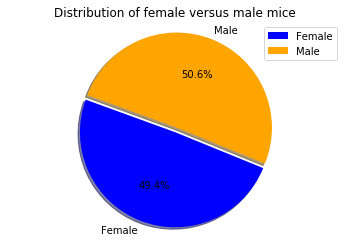

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_gender_count_df = combined_results_df.groupby(['Sex']).count().reset_index()

colors = ['blue', 'orange']
explode = (0.05, 0)
plot_pyplot = plt.pie(grouped_gender_count_df["Mouse ID"], explode = explode, labels=grouped_gender_count_df["Sex"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")
plt.title ("Distribution of female versus male mice")
plt.legend(['Female', 'Male'])
plt.legend(loc='upper right')

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
vol_treat = []
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for treatment in treatment:
            vol_treat = []
            for i in combined_results_df.index:
   
                if combined_results_df["Drug Regimen"][i] == treatment:
                    vol_treat.append(combined_results_df["Tumor Volume (mm3)"][i])
            
            df = pd.DataFrame(vol_treat) 
           
            quartiles = df[0].quantile([.25,.5,.75])
            lowerq = quartiles[0.25]
            upperq = quartiles[0.75]
            iqr = upperq-lowerq
            print(treatment)
            print(f"    The lower quartile of {treatment} is: {lowerq}")
            print(f"    The upper quartile of {treatment} is: {upperq}")
            print(f"    The interquartile range of {treatment} is: {iqr}")
            print(f"    The the median of {treatment} is: {quartiles[0.5]} ")
            lower_bound = lowerq - (1.5*iqr)
            upper_bound = upperq + (1.5*iqr)
            print(f"    Values below {lower_bound} could be outliers.")
            print(f"    Values above {upper_bound} could be outliers.")






Capomulin
    The lower quartile of Capomulin is: 37.685932865
    The upper quartile of Capomulin is: 45.0
    The interquartile range of Capomulin is: 7.314067135000002
    The the median of Capomulin is: 41.557808879999996 
    Values below 26.714832162499995 could be outliers.
    Values above 55.9711007025 could be outliers.
Ramicane
    The lower quartile of Ramicane is: 36.67463458499999
    The upper quartile of Ramicane is: 45.0
    The interquartile range of Ramicane is: 8.325365415000007
    The the median of Ramicane is: 40.67323554 
    Values below 24.18658646249998 could be outliers.
    Values above 57.48804812250001 could be outliers.
Infubinol
    The lower quartile of Infubinol is: 47.3123533
    The upper quartile of Infubinol is: 57.314443967500004
    The interquartile range of Infubinol is: 10.002090667500006
    The the median of Infubinol is: 51.82058438 
    Values below 32.309217298749985 could be outliers.
    Values above 72.31757996875001 could be outliers

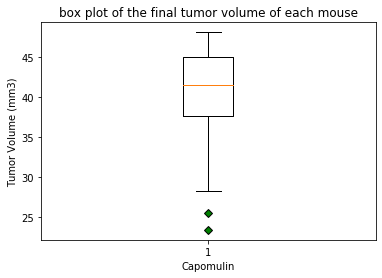

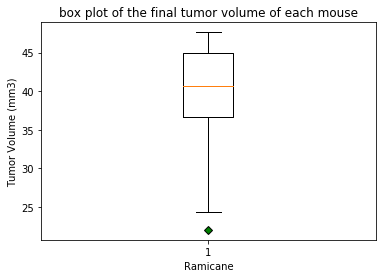

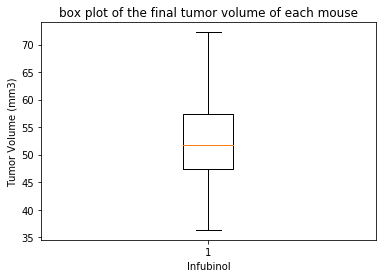

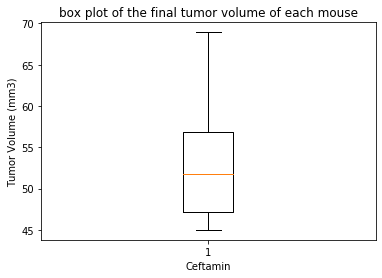

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
vol_treat = []
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for treatment in treatment:
            vol_treat = []
            for i in combined_results_df.index:
   
                if combined_results_df["Drug Regimen"][i] == treatment:
                    vol_treat.append(combined_results_df["Tumor Volume (mm3)"][i])
            
            fig1, ax1 = plt.subplots()
            ax1.set_title('box plot of the final tumor volume of each mouse')
            ax1.set_ylabel('Tumor Volume (mm3)')
            ax1.set_xlabel(treatment)
            green_diamond = dict(markerfacecolor='g', marker='D')
            ax1.boxplot(vol_treat,flierprops=green_diamond)
            plt.show()

## Line and scatter plots

Text(0.5, 0, 'Time')

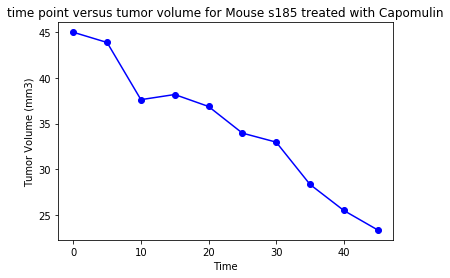

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combined_results_df_sort = combined_results_df.sort_values(by='Timepoint', ascending=True)
vol = []
time = []
for i in combined_results_df_sort.index:
   
       if combined_results_df_sort["Drug Regimen"][i] == "Capomulin":
            if combined_results_df_sort["Mouse ID"][i] == "s185":
                vol.append(combined_results_df["Tumor Volume (mm3)"][i])
                time.append(combined_results_df["Timepoint"][i])

plt.plot(time, vol, marker ='o', color='blue', label="Tumor Volume (mm3)")
plt.title("time point versus tumor volume for Mouse s185 treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time")



In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grouped_mouse_sum_df = combined_results_df.groupby(['Mouse ID']).sum()
grouped_mouse_sum_df.head()
vol1 = []
weight = []
for i in combined_results_df.index:
   
       if combined_results_df["Drug Regimen"][i] == "Capomulin":
            vol1.append(combined_results_df["Tumor Volume (mm3)"][i])
            weight.append(combined_results_df["Weight (g)"][i])

#print(len(vol1))
#print(len(weight))
grouped_mouse_sum_df.head()

#plt.scatter(weight, vol1, marker="o", facecolors="blue", edgecolors="black")
#plt.ylim(20,50)
#plt.xlim(14,27)
#plt.title("mouse weight versus average tumor volume for the Capomulin regimen")
#plt.xlabel("Weight (g)")
#plt.ylabel("Tumor Volume (mm3)")

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,200,230,225,563.127077,11
a251,210,250,225,552.370946,8
a262,170,290,225,586.116306,23
a275,200,280,225,527.709651,12
a366,112,203,105,382.479341,1


In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


correlation = st.pearsonr(weight,vol1)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.53


y = 0.96x + 21.49


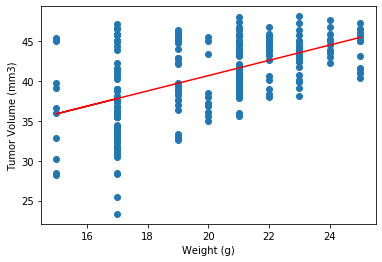

In [18]:

from scipy.stats import linregress
x_values = np.array(weight)
y_values = vol1
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

